In [1]:
%%html
<link rel="stylesheet" type="text/css" href="css/rise.css" />

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%config InlineBackend.figure_format = 'retina'
plt.style.use('bmh')
plt.rcParams['lines.markeredgecolor'] = 'w'
plt.rcParams['lines.markeredgewidth'] = 0.5
plt.rcParams['figure.figsize'] = [8, 6]

# Classification

- *Logistic regression*
- Cross validated predictions, probabilities and accuracy
- Confusion matrix
- ROC curve
- Multinomial logistic regression

### Learning goals - *Logistic regression*
|  |  |  |
|--|--|--|
| <img src="images/thinking-icon.png"> | <div class="alert alert-info">You will be able to apply a logistic regression binary classifier.</div> | `LogisticRegression` |
| <img src="images/thinking-icon.png"> | <div class="alert alert-info">You will be able to use your classifer to predict the class.</div> | `predict(X)` |
| <img src="images/thinking-icon.png"> | <div class="alert alert-info">You will be able to compute the accuracy of your classifier.</div> | `score(X, y)` |
| <img src="images/thinking-icon.png"> | <div class="alert alert-info">You will be able to use your classifer to get the probability of each possible class.</div> | `predict_proba(X)` |

Expression levels of 77 proteins measured in the cerebral cortex of 8 classes of control and Down syndrome (Ts65Dn) mice exposed to context fear conditioning.

https://www.kaggle.com/ruslankl/mice-protein-expression

In [2]:
import pandas as pd
df = pd.read_csv('data/Data_Cortex_Nuclear.csv')
df

,MouseID,DYRK1A_N,ITSN1_N,BDNF_N,NR1_N,NR2A_N,pAKT_N,pBRAF_N,pCAMKII_N,pCREB_N,...,pCFOS_N,SYP_N,H3AcK18_N,EGR1_N,H3MeK4_N,CaNA_N,Genotype,Treatment,Behavior,class
0,309_1,0.503644,0.747193,0.430175,2.816329,5.990152,0.218830,0.177565,2.373744,0.232224,...,0.108336,0.427099,0.114783,0.131790,0.128186,1.675652,Control,Memantine,C/S,c-CS-m
1,309_2,0.514617,0.689064,0.411770,2.789514,5.685038,0.211636,0.172817,2.292150,0.226972,...,0.104315,0.441581,0.111974,0.135103,0.131119,1.743610,Control,Memantine,C/S,c-CS-m
2,309_3,0.509183,0.730247,0.418309,2.687201,5.622059,0.209011,0.175722,2.283337,0.230247,...,0.106219,0.435777,0.111883,0.133362,0.127431,1.926427,Control,Memantine,C/S,c-CS-m
3,309_4,0.442107,0.617076,0.358626,2.466947,4.979503,0.222886,0.176463,2.152301,0.207004,...,0.111262,0.391691,0.130405,0.147444,0.146901,1.700563,Control,Memantine,C/S,c-CS-m
4,309_5,0.434940,0.617430,0.358802,2.365785,4.718679,0.213106,0.173627,2.134014,0.192158,...,0.110694,0.434154,0.118481,0.140314,0.148380,1.839730,Control,Memantine,C/S,c-CS-m
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1075,J3295_11,0.254860,0.463591,0.254860,2.092082,2.600035,0.211736,0.171262,2.483740,0.207317,...,0.183324,0.374088,0.318782,0.204660,0.328327,1.364823,Ts65Dn,Saline,S/C,t-SC-s
1076,J3295_12,0.272198,0.474163,0.251638,2.161390,2.801492,0.251274,0.182496,2.512737,0.216339,...,0.175674,0.375259,0.325639,0.200415,0.293435,1.364478,Ts65Dn,Saline,S/C,t-SC-s
1077,J3295_13,0.228700,0.395179,0.234118,1.733184,2.220852,0.220665,0.161435,1.989723,0.185164,...,0.158296,0.422121,0.321306,0.229193,0.355213,1.430825,Ts65Dn,Saline,S/C,t-SC-s
1078,J3295_14,0.221242,0.412894,0.243974,1.876347,2.384088,0.208897,0.173623,2.086028,0.192044,...,0.196296,0.397676,0.335936,0.251317,0.365353,1.404031,Ts65Dn,Saline,S/C,t-SC-s


Goal is to use protein expression levels to classify mice. Each mouse in the dataset belongs to one of the following eight classes:

1. c-CS-s: control mice,  stimulated to learn,      injected with saline
2. c-CS-m: control mice,  stimulated to learn,      injected with memantine
3. c-SC-s: control mice,  not stimulated to learn,  injected with saline
4. c-SC-m: control mice,  not stimulated to learn,  injected with memantine
5. t-CS-s: trisomy mice,  stimulated to learn,      injected with saline
6. t-CS-m: trisomy mice,  stimulated to learn,      injected with memantine
7. t-SC-s: trisomy mice,  not stimulated to learn,  injected with saline
8. t-SC-m: trisomy mice,  not stimulated to learn,  injected with memantine

which are combinations of:

* Control vs. down syndrome.
* Did or did not recieve behavioral conditioning.
* Saline vs. memantine injection.

First, throw out features and data points with missing measurements.

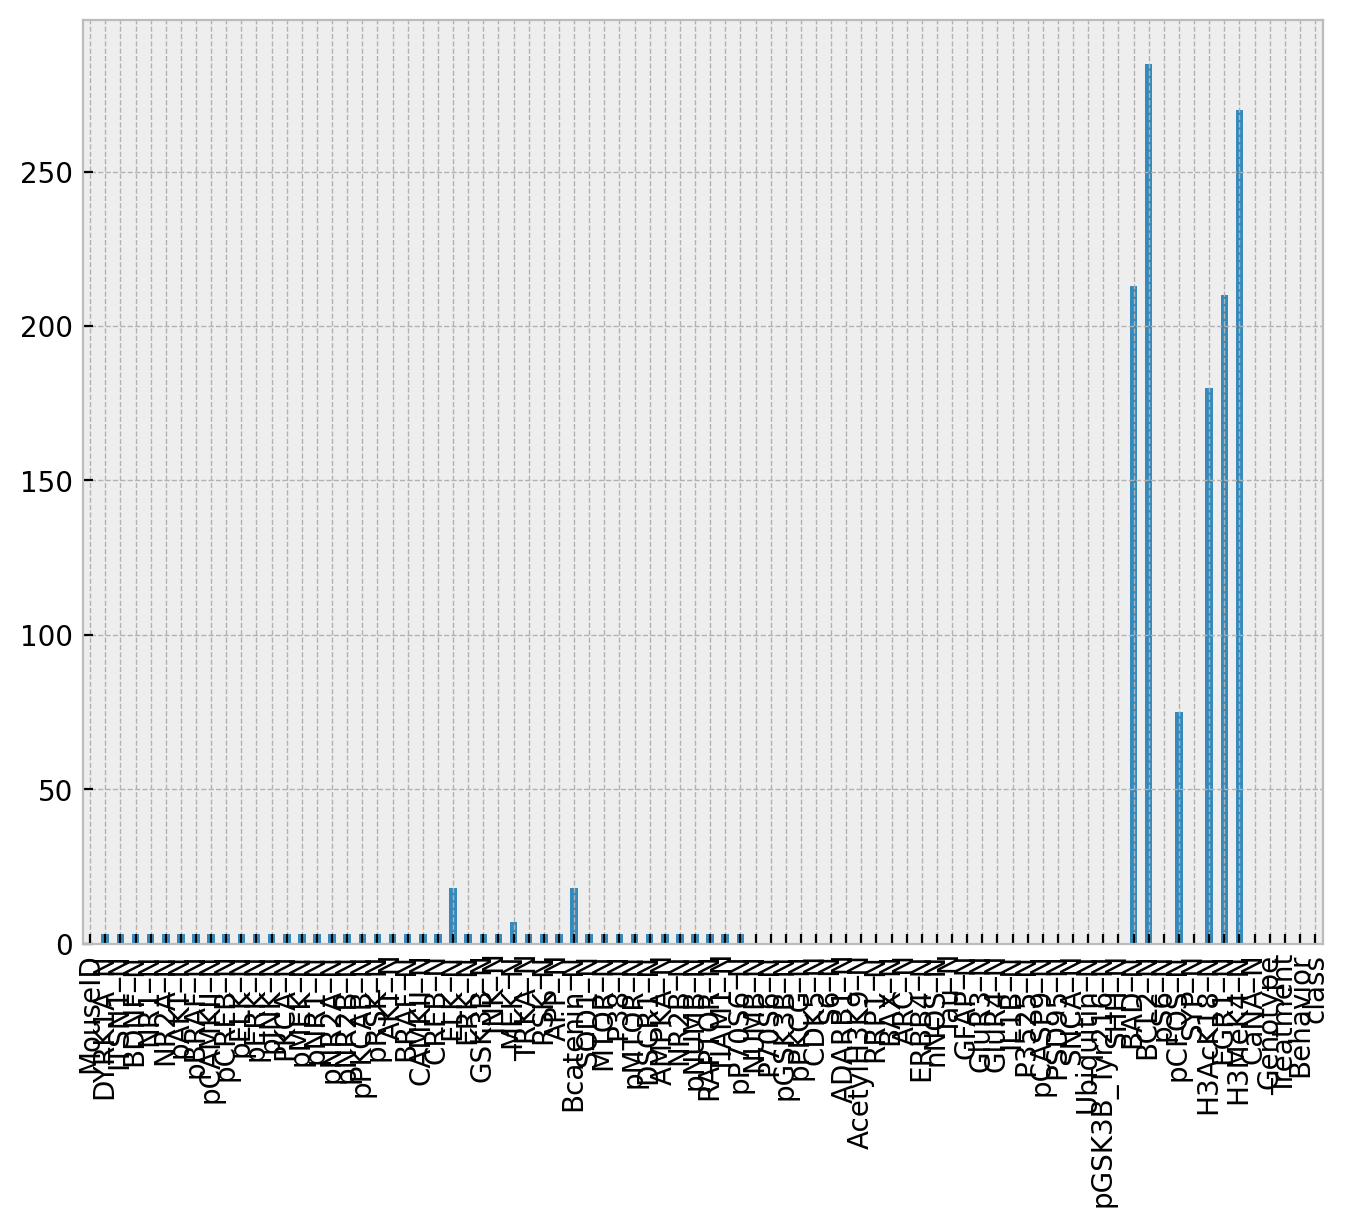

In [3]:
df.isnull().sum().plot.bar();

In [4]:
miss_too_many = df.isnull().sum() > 10

miss_too_many

MouseID      False
DYRK1A_N     False
ITSN1_N      False
BDNF_N       False
NR1_N        False
             ...  
CaNA_N       False
Genotype     False
Treatment    False
Behavior     False
class        False
Length: 82, dtype: bool

In [5]:
df2 = df.loc[:, ~miss_too_many]

df.shape, df2.shape

((1080, 82), (1080, 74))

In [6]:
# discard mice with missing measurements
df2 = df2.dropna()

df2.shape

(1073, 74)

The dataset we will use for building a classsification model.

In [7]:
df2

,MouseID,DYRK1A_N,ITSN1_N,BDNF_N,NR1_N,NR2A_N,pAKT_N,pBRAF_N,pCAMKII_N,pCREB_N,...,Ubiquitin_N,pGSK3B_Tyr216_N,SHH_N,pS6_N,SYP_N,CaNA_N,Genotype,Treatment,Behavior,class
0,309_1,0.503644,0.747193,0.430175,2.816329,5.990152,0.218830,0.177565,2.373744,0.232224,...,1.044979,0.831557,0.188852,0.106305,0.427099,1.675652,Control,Memantine,C/S,c-CS-m
1,309_2,0.514617,0.689064,0.411770,2.789514,5.685038,0.211636,0.172817,2.292150,0.226972,...,1.009883,0.849270,0.200404,0.106592,0.441581,1.743610,Control,Memantine,C/S,c-CS-m
2,309_3,0.509183,0.730247,0.418309,2.687201,5.622059,0.209011,0.175722,2.283337,0.230247,...,0.996848,0.846709,0.193685,0.108303,0.435777,1.926427,Control,Memantine,C/S,c-CS-m
3,309_4,0.442107,0.617076,0.358626,2.466947,4.979503,0.222886,0.176463,2.152301,0.207004,...,0.990225,0.833277,0.192112,0.103184,0.391691,1.700563,Control,Memantine,C/S,c-CS-m
4,309_5,0.434940,0.617430,0.358802,2.365785,4.718679,0.213106,0.173627,2.134014,0.192158,...,0.997775,0.878668,0.205604,0.104784,0.434154,1.839730,Control,Memantine,C/S,c-CS-m
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1075,J3295_11,0.254860,0.463591,0.254860,2.092082,2.600035,0.211736,0.171262,2.483740,0.207317,...,1.261651,0.962942,0.275547,0.115806,0.374088,1.364823,Ts65Dn,Saline,S/C,t-SC-s
1076,J3295_12,0.272198,0.474163,0.251638,2.161390,2.801492,0.251274,0.182496,2.512737,0.216339,...,1.254872,0.983690,0.283207,0.113614,0.375259,1.364478,Ts65Dn,Saline,S/C,t-SC-s
1077,J3295_13,0.228700,0.395179,0.234118,1.733184,2.220852,0.220665,0.161435,1.989723,0.185164,...,1.242248,0.976609,0.290843,0.118948,0.422121,1.430825,Ts65Dn,Saline,S/C,t-SC-s
1078,J3295_14,0.221242,0.412894,0.243974,1.876347,2.384088,0.208897,0.173623,2.086028,0.192044,...,1.301071,0.989286,0.306701,0.125295,0.397676,1.404031,Ts65Dn,Saline,S/C,t-SC-s


Can you predict genotype based on protein expression?

What about treatment, behavior or class?

In [8]:
expr = df2.loc[:,'DYRK1A_N':'CaNA_N']  # just protein expression levels
genotype = df2['Genotype']
treatment = df2['Treatment']
behavior = df2['Behavior']
mouse_class = df2['class']

expr.shape, genotype.shape

((1073, 69), (1073,))

In [9]:
genotype.unique()

array(['Control', 'Ts65Dn'], dtype=object)

The problem with linear regression.

$\hat{y} = \beta_0 + \beta_1 x_1 + \dots + \beta_n x_n$

But $y$ (*Genotype*) will be a continuous variable, whereas it needs to be one of two things: *Control* or *Ts65Dn*.

We could still try to use linear regression and just impose a threshold to do the classification.

![](images/linear-regression-threshold.jpeg)

Image from https://towardsdatascience.com/understanding-logistic-regression-9b02c2aec102

But what if we have an outlier in the data?

Non-ideal data could easily lead to misclassification using a linear model.

![](images/linear-regression-threshold-outlier.png)

Image from https://towardsdatascience.com/understanding-logistic-regression-9b02c2aec102

A sigmoidal function will better classify categorical data and will be less prone to error due to outliers.

![](images/logistic-regression-classifier.png)

Image from https://towardsdatascience.com/understanding-logistic-regression-9b02c2aec102

### Logistic regression

$\hat{y} = sigmoid \left( \beta_0 + \beta_1 x_1 + \dots + \beta_n x_n \right)$

$y = Bernoilli(\hat{y}) = 
\left\{ \begin{matrix}
0 & Control \\
1 & Ts65Dn \\
\end{matrix} \right\}$

How well can you predict genotype based on protein expression using logistic regression?

In [10]:
X = expr.to_numpy()
y = genotype.to_numpy()

X.shape, y.shape, np.unique(y)

((1073, 69), (1073,), array(['Control', 'Ts65Dn'], dtype=object))

In [11]:
from sklearn.linear_model import LogisticRegression

# train model on training set
model = LogisticRegression(max_iter=300)
model.fit(X, y)

# evaluate accuracy on testing set
accuracy = model.score(X, y)
accuracy

0.9478098788443616

But evaluating accuracy on the same data used to train the model is liable to give you a false impression of how accurate your model is when it comes to data it was not trained on.

In [12]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

# split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=1)

# train model on training set
model = LogisticRegression(max_iter=300)
model.fit(X_train, y_train)

# evaluate accuracy on testing set
accuracy = model.score(X_test, y_test)
accuracy

0.9023255813953488

Compare true vs. predicted genotype for the mice in the test set.

In [13]:
# predict genotype of each mouse in the test set based on protein expression
y_test_pred = model.predict(X_test)

# print table of true vs. predicted genotypes for mice in the test set
results = pd.DataFrame(y_test, columns=['true'])
results["prediction"] = y_test_pred
results

,true,prediction
0,Ts65Dn,Control
1,Control,Control
2,Control,Control
3,Ts65Dn,Ts65Dn
4,Control,Control
...,...,...
425,Control,Ts65Dn
426,Control,Control
427,Ts65Dn,Ts65Dn
428,Control,Control


From logistic regression model you can determine not only the predicted genotypes, but the predicted probability of each genotype.

In [14]:
y_test_proba = model.predict_proba(X_test)
y_test_proba.shape

(430, 2)

In [15]:
model.classes_

array(['Control', 'Ts65Dn'], dtype=object)

In [16]:
results['P(Control)'] = y_test_proba[:,0]
results['P(Ts65Dn)'] = y_test_proba[:,1]
results

,true,prediction,P(Control),P(Ts65Dn)
0,Ts65Dn,Control,0.882910,0.117090
1,Control,Control,0.792222,0.207778
2,Control,Control,0.508847,0.491153
3,Ts65Dn,Ts65Dn,0.330245,0.669755
4,Control,Control,0.776513,0.223487
...,...,...,...,...
425,Control,Ts65Dn,0.443325,0.556675
426,Control,Control,0.802102,0.197898
427,Ts65Dn,Ts65Dn,0.428386,0.571614
428,Control,Control,0.565721,0.434279


### Learning goals - *Logistic regression*
|  |  |  |
|--|--|--|
| <img src="images/thinking-icon.png"> | <div class="alert alert-info">You will be able to apply a logistic regression binary classifier.</div> | `LogisticRegression` |
| <img src="images/thinking-icon.png"> | <div class="alert alert-info">You will be able to use your classifer to predict the class.</div> | `predict(X)` |
| <img src="images/thinking-icon.png"> | <div class="alert alert-info">You will be able to compute the accuracy of your classifier.</div> | `score(X, y)` |
| <img src="images/thinking-icon.png"> | <div class="alert alert-info">You will be able to use your classifer to get the probability of each possible class.</div> | `predict_proba(X)` |

# Classification

- Logistic regression
- *Cross validated predictions, probabilities and accuracy*
- Confusion matrix
- ROC curve
- Multinomial logistic regression

Ok, but all of the above was only for one particular way of splitting the data in train/test sets. How much can we expect this to extrapolate to other ways of splitting the data or new data entirely?

And we only got predictions for the test set. Is there any way we can use our entire date set to get predictions and measure accuracy?

What about this? Why or why not?

In [17]:
from sklearn.linear_model import LogisticRegression

# train model on training set
model = LogisticRegression(max_iter=300)
model.fit(X, y)

# evaluate accuracy on testing set
accuracy = model.score(X, y)
accuracy

0.9478098788443616

You should already know that to get a reasonable measure of accuracy that utilizes the entire data set you should use cross validation.

In [27]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_validate
from sklearn.model_selection import StratifiedKFold

model = LogisticRegression(max_iter=300)
kf = StratifiedKFold(n_splits=5, shuffle=True, random_state=1)

cv = cross_validate(model, X, y, cv=kf, scoring='accuracy')

accuracy = cv['test_score']
accuracy, np.mean(accuracy)

(array([0.93953488, 0.93023256, 0.94418605, 0.92056075, 0.90654206]),
 0.9282112584220821)

In [33]:
from sklearn.model_selection import cross_val_score

model = LogisticRegression(max_iter=300)

accuracy = cross_val_score(model, X, y, cv=5, scoring='accuracy')
accuracy, np.mean(accuracy)

(array([0.93953488, 0.93023256, 0.94418605, 0.92056075, 0.90654206]),
 0.9282112584220821)

However, you can also use cross validation to get test (validation) set predictions for your entire dataset.

In this way, every prediction is for data in a validation set on which the model was not trained.

![](images/cross_val_predict.png)

In [24]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import StratifiedKFold

model = LogisticRegression(max_iter=300)
kf = StratifiedKFold(n_splits=5, shuffle=True, random_state=1)

y_pred = y.copy()
y_proba = np.zeros([len(y), 2])

for train_ind, test_ind in kf.split(X, y):
    model.fit(X[train_ind], y[train_ind])
    
    y_pred[test_ind] = model.predict(X[test_ind])
    y_proba[test_ind] = model.predict_proba(X[test_ind])

y.shape, y_pred.shape, y_proba.shape

((1073,), (1073,), (1073, 2))

In [34]:
from sklearn.model_selection import cross_val_predict

model = LogisticRegression(max_iter=300)

y_pred = cross_val_predict(model, X, y, cv=5)
y_proba = cross_val_predict(model, X, y, cv=5, method='predict_proba')

y.shape, y_pred.shape, y_proba.shape

((1073,), (1073,), (1073, 2))

# Classification

- Logistic regression
- Cross validated predictions, probabilities and accuracy
- *Confusion matrix*
- ROC curve
- Multinomial logistic regression

### Learning goals - *Confusion matrix*
|  |  |  |
|--|--|--|
| <img src="images/thinking-icon.png"> | <div class="alert alert-info">You will be able to compute, display, and interpret confusion matrices.</div> | `confusion_matrix` |

In [37]:
np.unique(y)

array(['Control', 'Ts65Dn'], dtype=object)

In [38]:
model.fit(X, y)
model.classes_

array(['Control', 'Ts65Dn'], dtype=object)

In [39]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y, y_pred)
cm

array([[406, 160],
       [273, 234]])

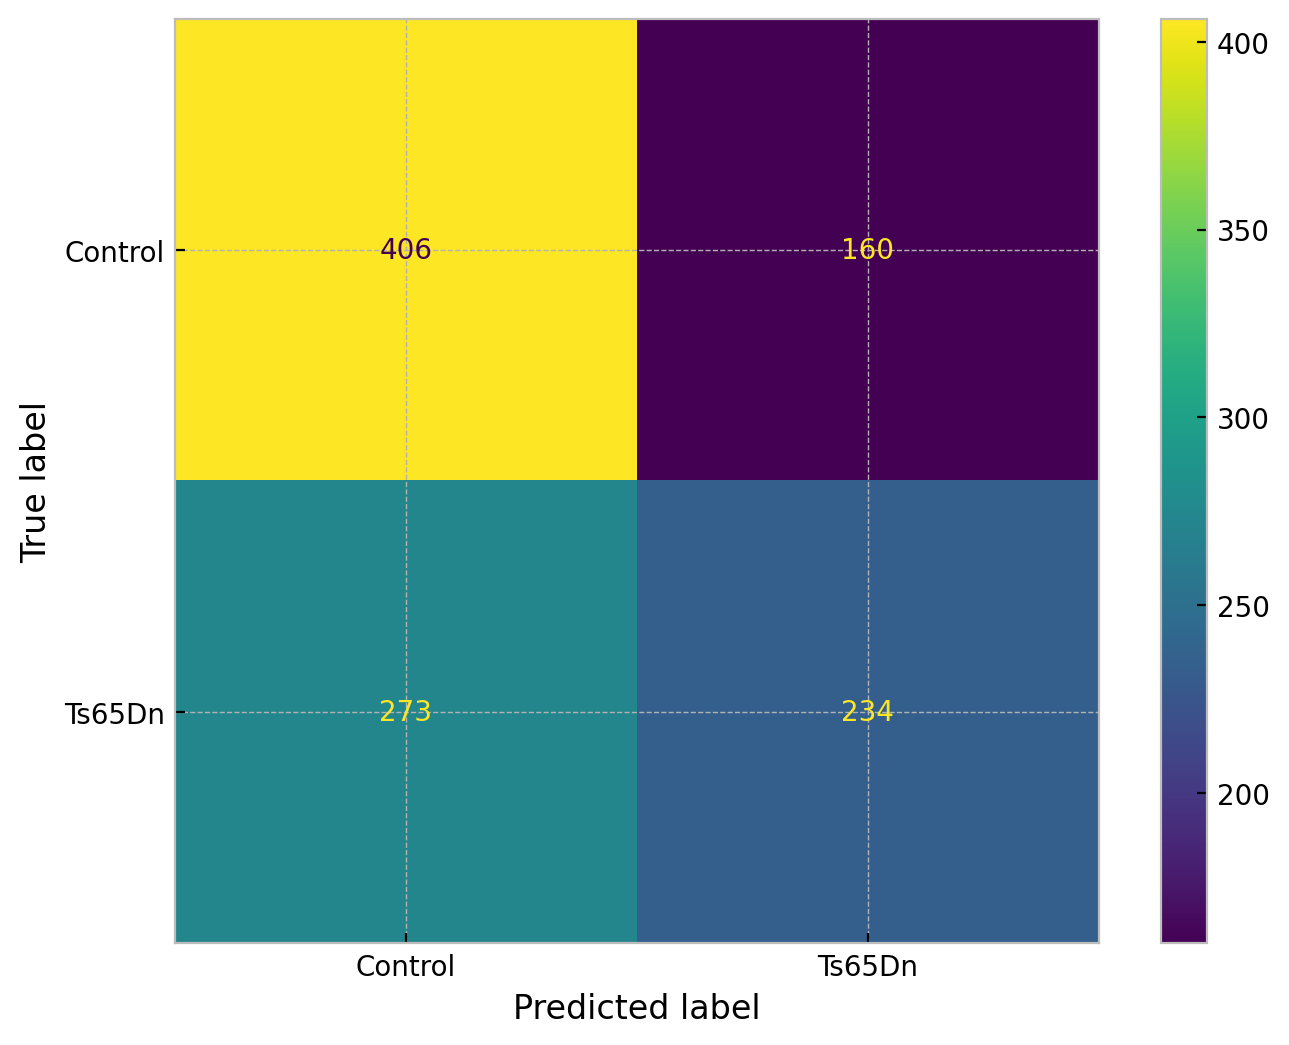

In [40]:
from sklearn.metrics import ConfusionMatrixDisplay

cmd = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model.classes_)
cmd.plot();

### Learning goals - *Confusion matrix*
|  |  |  |
|--|--|--|
| <img src="images/thinking-icon.png"> | <div class="alert alert-info">You will be able to compute, display, and interpret confusion matrices.</div> | `confusion_matrix` |

# Classification

- Logistic regression
- Cross validated predictions, probabilities and accuracy
- Confusion matrix
- *ROC curve*
- Multinomial logistic regression

### Learning goals - *ROC curve*
|  |  |  |
|--|--|--|
| <img src="images/thinking-icon.png"> | <div class="alert alert-info">You will be able to compute precision, recall, and F1 scores.</div> | `classification_report` |
| <img src="images/thinking-icon.png"> | <div class="alert alert-info">You will be able to compute, display, and interpret ROC curves.</div> | `roc_curve` |

### $precision = \frac{TP}{TP + FP} = \frac{\text{correct P predictions}}{\text{all P predictions}}$

precision is fraction of P predictions that are correct

### $recall = \frac{TP}{TP + FN} = \frac{\text{correct P predictions}}{\text{all true P}}$

recall is fraction of true P correctly predicted

### $F1 = 2\ \frac{precision\ \times\ recall}{precision\ +\ recall}$

F1 score is the harmonic mean of the precision and recall

$\textrm{worst}\; 0 \le F1 \le 1 \;\textrm{best}$

In [41]:
from sklearn.metrics import classification_report

print(classification_report(y, y_pred))

              precision    recall  f1-score   support

     Control       0.60      0.72      0.65       566
      Ts65Dn       0.59      0.46      0.52       507

    accuracy                           0.60      1073
   macro avg       0.60      0.59      0.59      1073
weighted avg       0.60      0.60      0.59      1073



### Reciever Operating Charachteristic (ROC) curve

![](images/roc.png)

Image from Wikipedia

### $\text{true positive rate} = \frac{TP}{P} = \frac{TP}{TP + FN}$

### $\text{false positive rate} = \frac{FP}{N} = \frac{FP}{FP + TN}$

The ROC curve represents the changing true and false positive rates as you change your binary classification threshold.

![](images/roc-thresholds.png)

Image from https://towardsdatascience.com/understanding-the-roc-curve-in-three-visual-steps-795b1399481c

Where you place the binary classification threshold (e.g., 0.5) will define your true positive and false positive rates.

![](images/logistic-regression-classifier.png)

Image from https://towardsdatascience.com/understanding-logistic-regression-9b02c2aec102

In [42]:
model.classes_

array(['Control', 'Ts65Dn'], dtype=object)

In [43]:
y.shape, y_proba.shape

((1073,), (1073, 2))

In [44]:
from sklearn.metrics import roc_curve

# ROC curve for the probability of classifying the genotype of each mouse as Ts65Dn
fpr, tpr, thresholds = roc_curve(y, y_proba[:,1], pos_label=model.classes_[1])

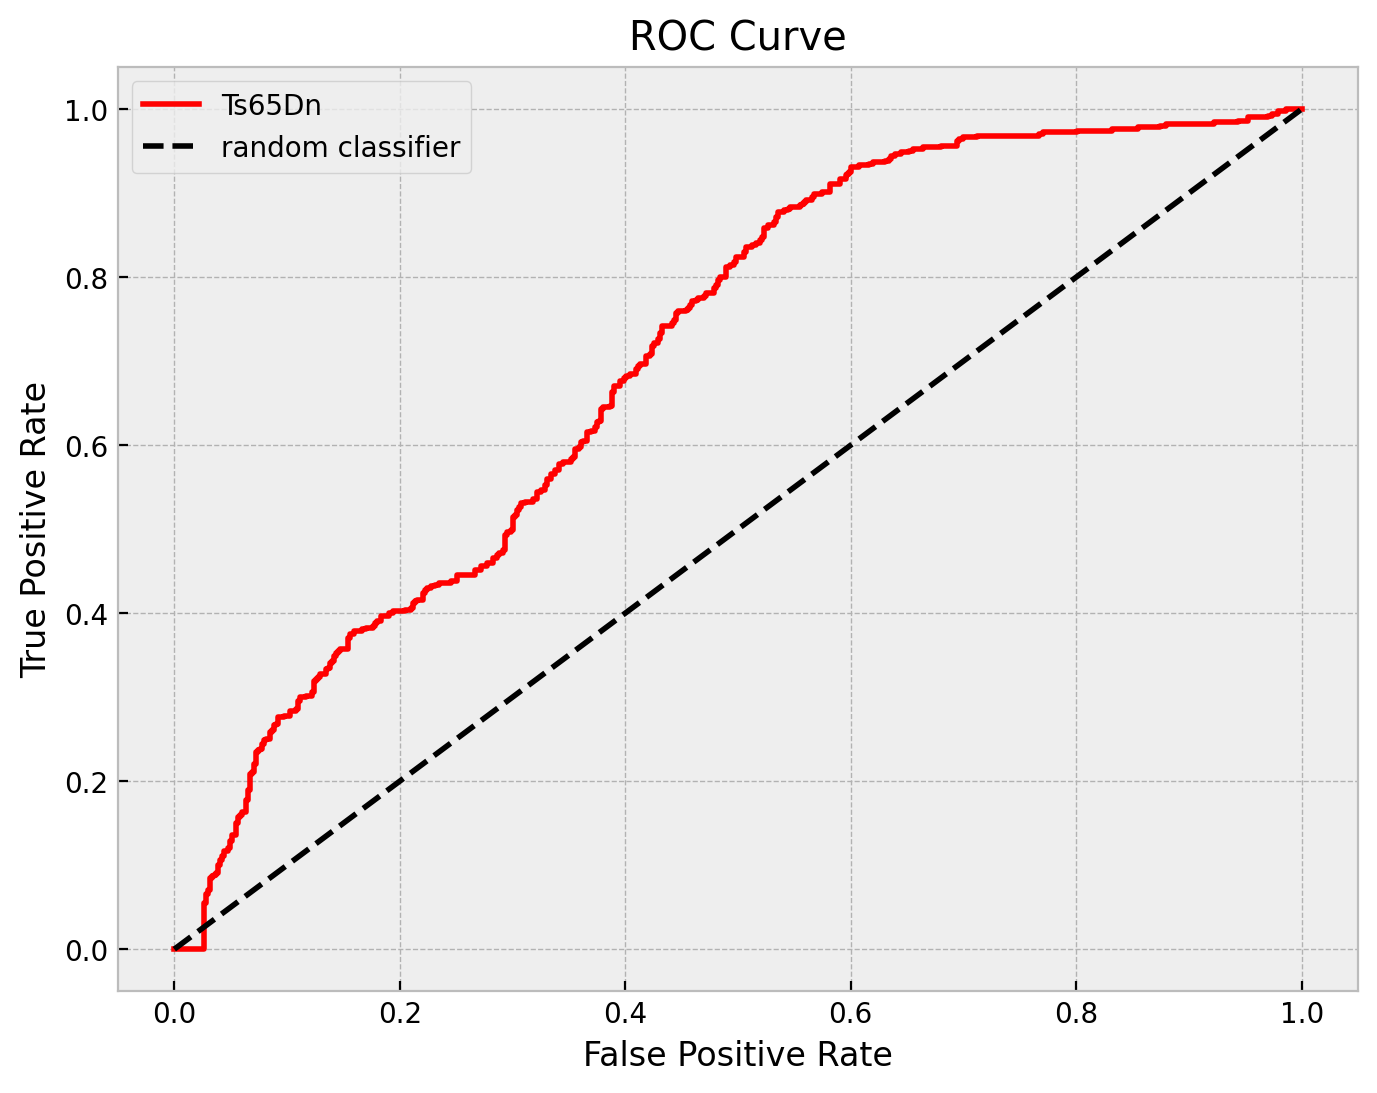

In [45]:
# P(Ts65Dn) ROC curve
plt.plot(fpr, tpr, color='r', label=model.classes_[1])
plt.plot([0, 1], [0, 1], color='k', linestyle='--', label='random classifier')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend();

In [46]:
# evaluate the model based on the area under the curve (auc)
from sklearn.metrics import auc

auc(fpr, tpr)

0.702667949066427

### Learning goals - *ROC curve*
|  |  |  |
|--|--|--|
| <img src="images/thinking-icon.png"> | <div class="alert alert-info">You will be able to compute precision, recall, and F1 scores.</div> | `classification_report` |
| <img src="images/thinking-icon.png"> | <div class="alert alert-info">You will be able to compute, display, and interpret ROC curves.</div> | `roc_curve` |

0.9684696928513183

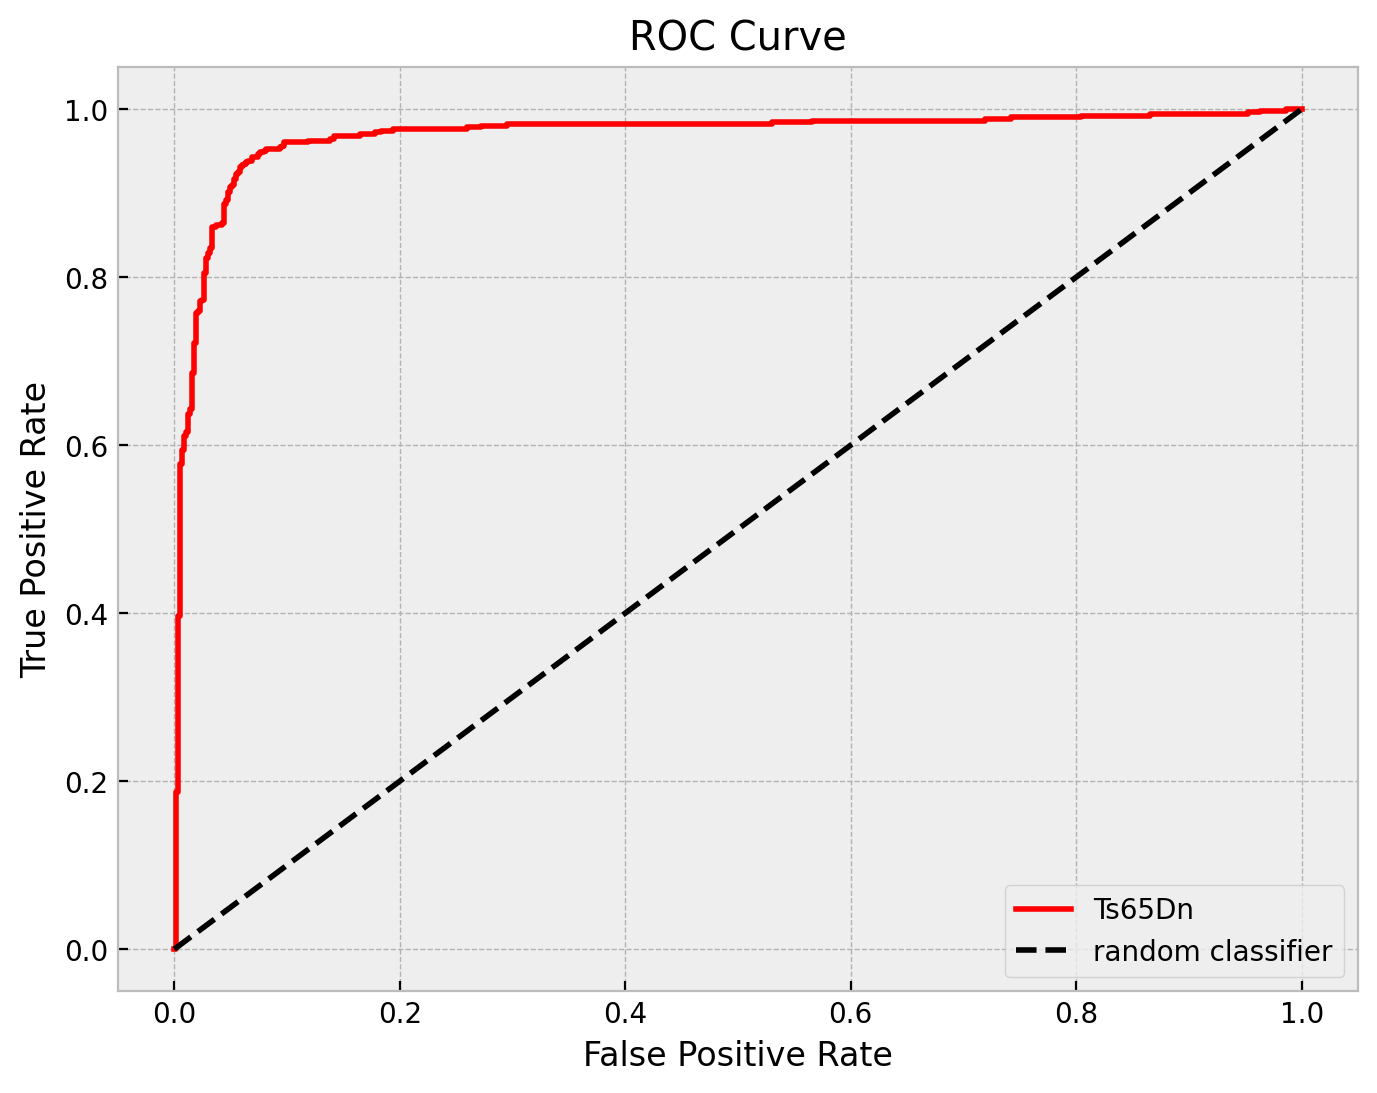

In [36]:
from sklearn.metrics import roc_curve, auc

# ROC curve for the probability of classifying the genotype of each mouse as Ts65Dn
fpr, tpr, thresholds = roc_curve(y, y_proba[:,1], pos_label=model.classes_[1])

# P(Ts65Dn) ROC curve
plt.plot(fpr, tpr, color='r', label=model.classes_[1])
plt.plot([0, 1], [0, 1], color='k', linestyle='--', label='random classifier')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend();

# evaluate the model based on the area under the curve (auc)
auc(fpr, tpr)

# Exercise

1. Use logistic regression to predict behavior (C/S vs. S/C) based on protein expression.

    C/S: stimulated to learn
    S/C: not stimulated to learn

2. Generate a confusion matrix and ROC curve to visualize the performance of your classifier.
3. Plot an ROC curve for classification of mice that underwent C/S behavioral training.

In [ ]:
X = expr.to_numpy()
y = behavior.to_numpy()

X.shape, y.shape, np.unique(y)

((1073, 69), (1073,), array(['C/S', 'S/C'], dtype=object))

In [ ]:
# construct a logistic regression model object
model = LogisticRegression(max_iter=300)

# Get cross valdiated predictions
y_pred = ...

# get cross validated probabilities
y_proba = ...

# get a cross validated accuracy
accuracy  = ...
accuracy

In [ ]:
# create and display a confusion matrix for the 
# predicted vs. true behavioral training method of each mouse
...

In [ ]:
# create and display a ROC curve for classification of mice
# that underwent C/S behavioral training (i.e., y = 'C/S')
...

# Exercise Key

1. Use logistic regression to predict behavior (C/S vs. S/C) based on protein expression.

    C/S: stimulated to learn
    S/C: not stimulated to learn

2. Generate a confusion matrix and ROC curve to visualize the performance of your classifier.
3. Plot an ROC curve for classification of mice that underwent C/S behavioral training.

In [48]:
X = expr.to_numpy()
y = behavior.to_numpy()

X.shape, y.shape, np.unique(y)

((1073, 69), (1073,), array(['C/S', 'S/C'], dtype=object))

In [50]:
# construct a logistic regression model object
model = LogisticRegression(max_iter=300)

# Get cross valdiated predictions
y_pred = cross_val_predict(model, X, y, cv=10)

# get cross validated probabilities
y_proba = cross_val_predict(model, X, y, cv=10, method='predict_proba')

# get a cross validated accuracy
accuracy  = cross_val_score(model, X, y, cv=10, scoring='accuracy').mean()
accuracy

0.997196261682243

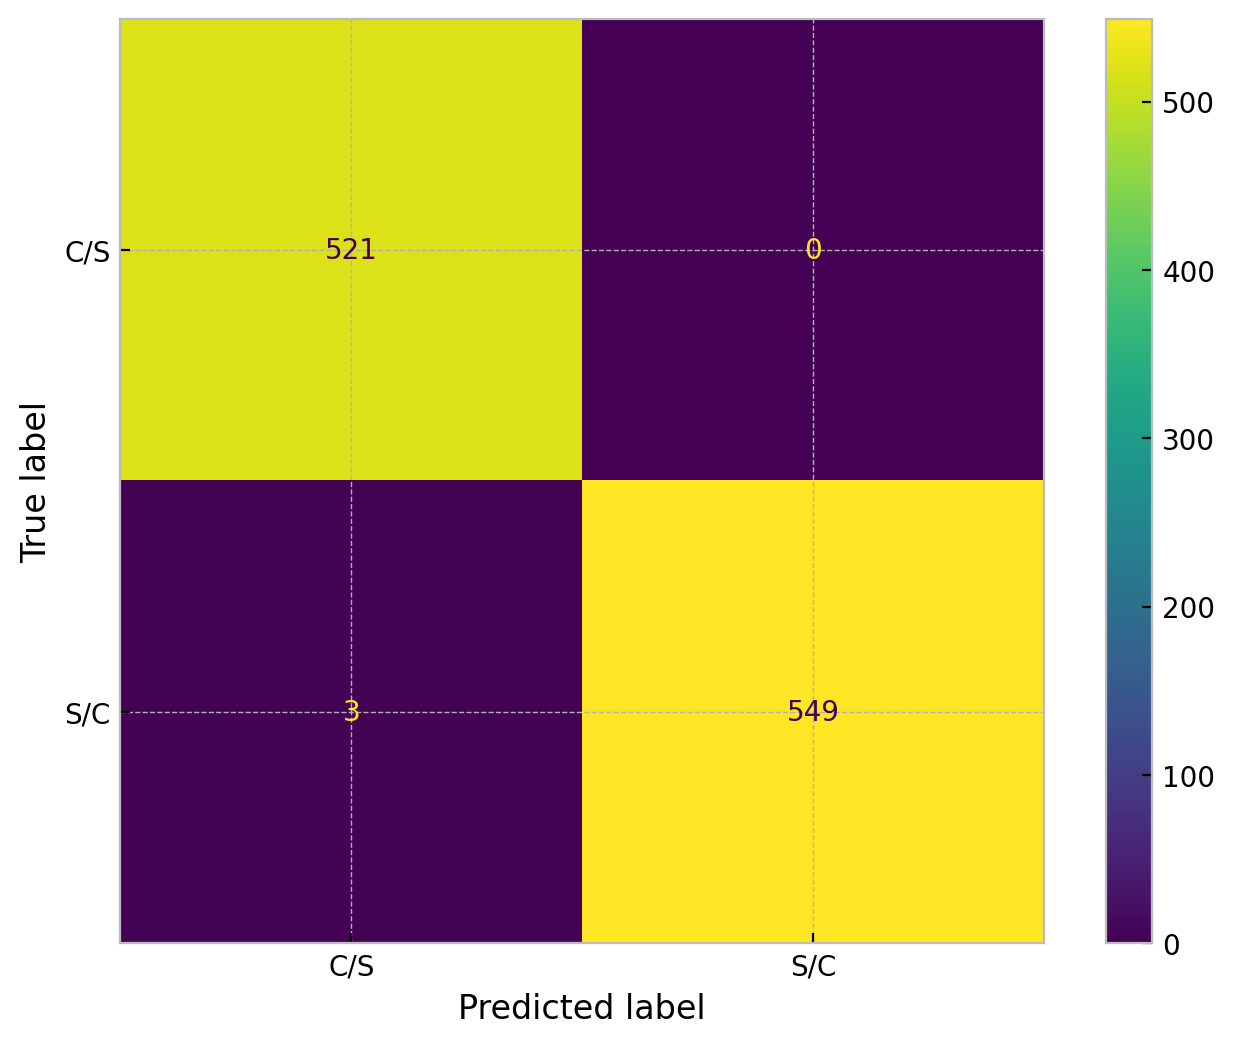

In [51]:
# create and display a confusion matrix for the 
# predicted vs. true behavioral training method of each mouse
cm = confusion_matrix(y, y_pred)
cmd = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=np.unique(y))
cmd.plot();

auc = 0.9999930457036357


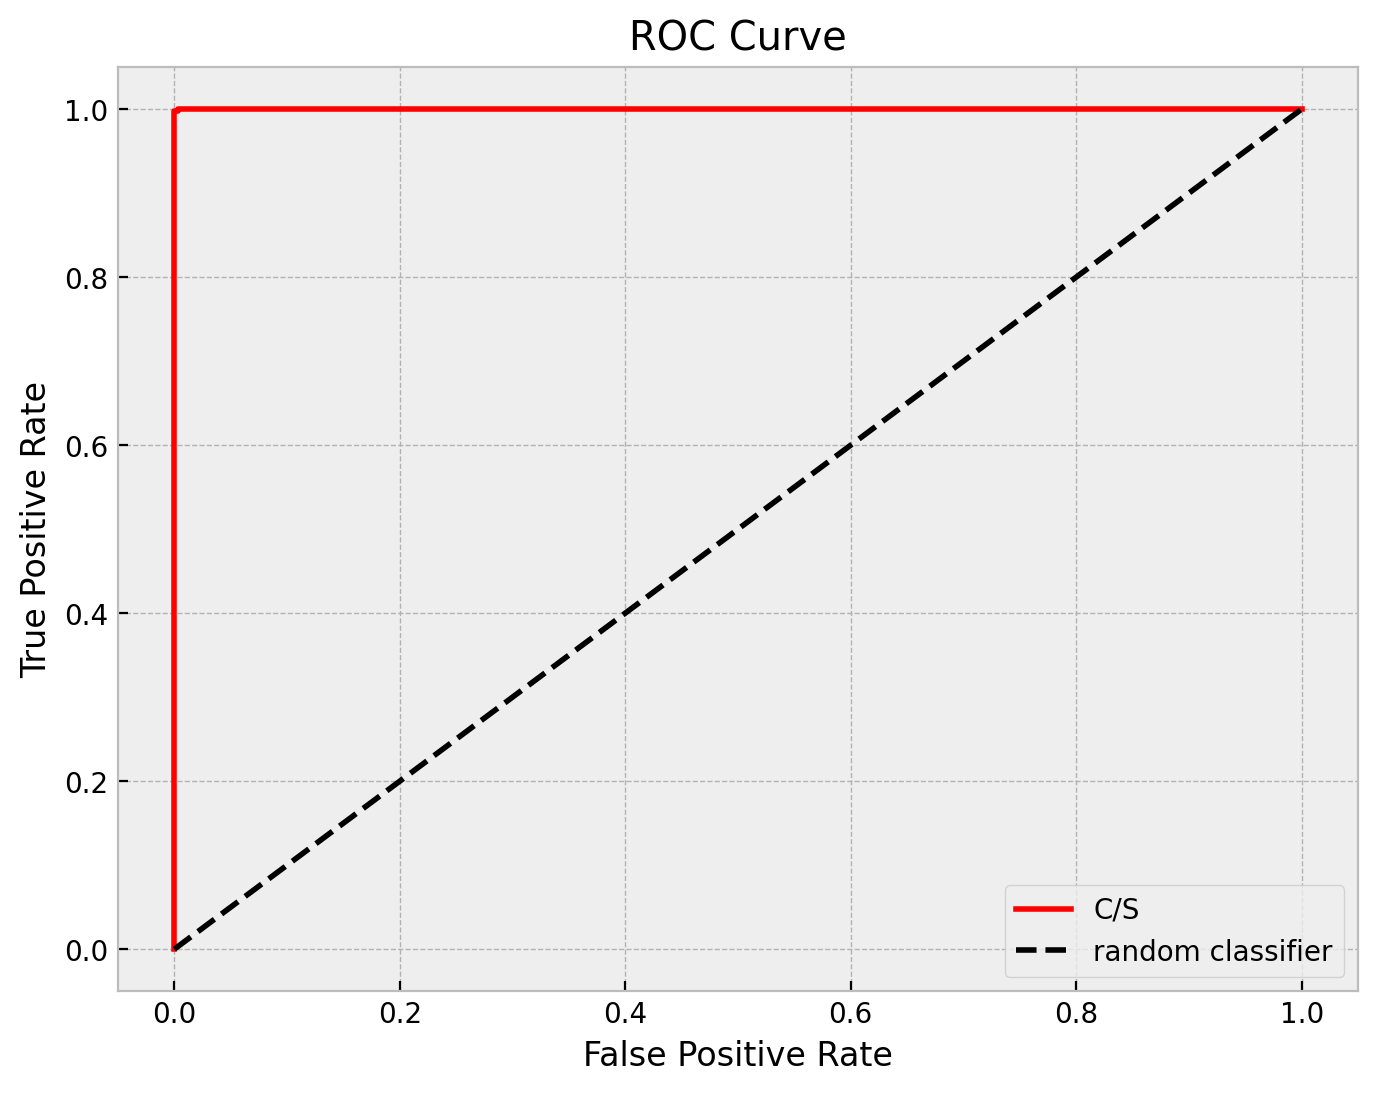

In [54]:
# create and display a ROC curve for classification of mice
# that underwent C/S behavioral training (i.e., y = 'C/S')
i = 0  # C/S class
fpr, tpr, thresholds = roc_curve(y, y_proba[:,i], pos_label=np.unique(y)[i])

# P(C/S) ROC curve
plt.plot(fpr, tpr, color='r', label=np.unique(y)[i])
plt.plot([0, 1], [0, 1], color='k', linestyle='--', label='random classifier')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend();

# evaluate the model based on the area under the curve (auc)
print("auc =", auc(fpr, tpr))

# Exercise

Write a function that takes as input a classification model, cross validation partitioning object and data X and y, and displays a confusion matrix based on the true vs. predicted classes across validation sets.

In [ ]:
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

def show_confusion_matrix(model, kfolds, X, y):
    ...
    pass

# Exercise Key

Write a function that takes as input a classification model, cross validation partitioning object and data X and y, and displays a confusion matrix based on the true vs. predicted classes across validation sets.

In [59]:
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.utils import shuffle

def show_confusion_matrix(model, kfolds, X, y):
    # shuffle data
    Xs, ys = shuffle(X, y, random_state=0)
    # get cross validated predictions
    y_pred = cross_val_predict(model, X, y, cv=kfolds)
    # confusion matrix for known y and predictions from validation folds
    cm = confusion_matrix(y, y_pred)
    cmd = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=np.unique(y))
    cmd.plot();

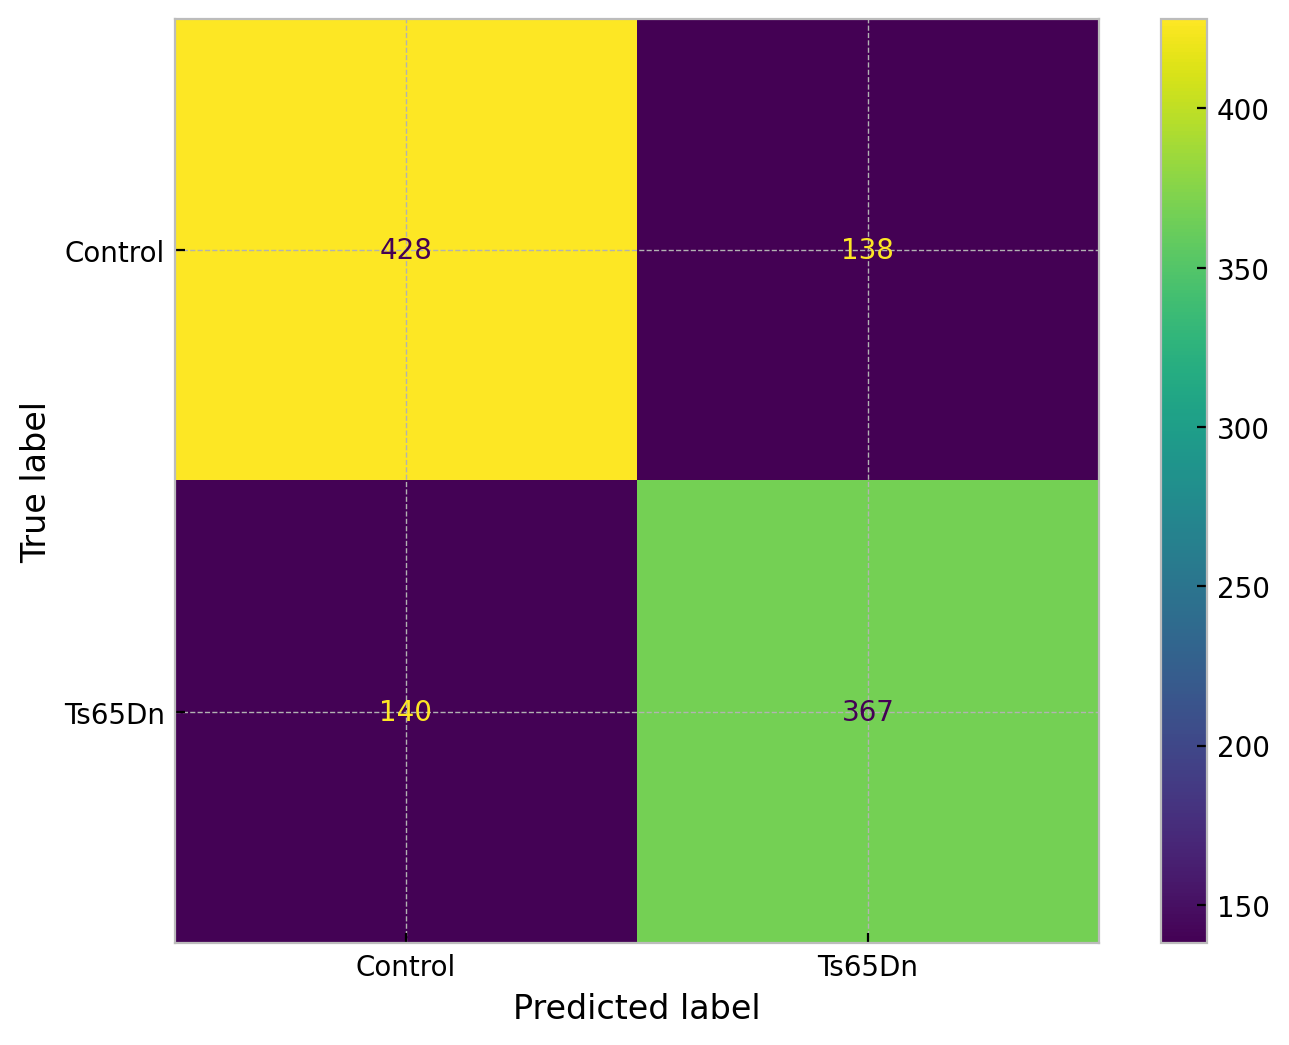

In [60]:
X = expr.to_numpy()
y = genotype.to_numpy()

model = LogisticRegression(max_iter=300)

show_confusion_matrix(model, 10, X, y)

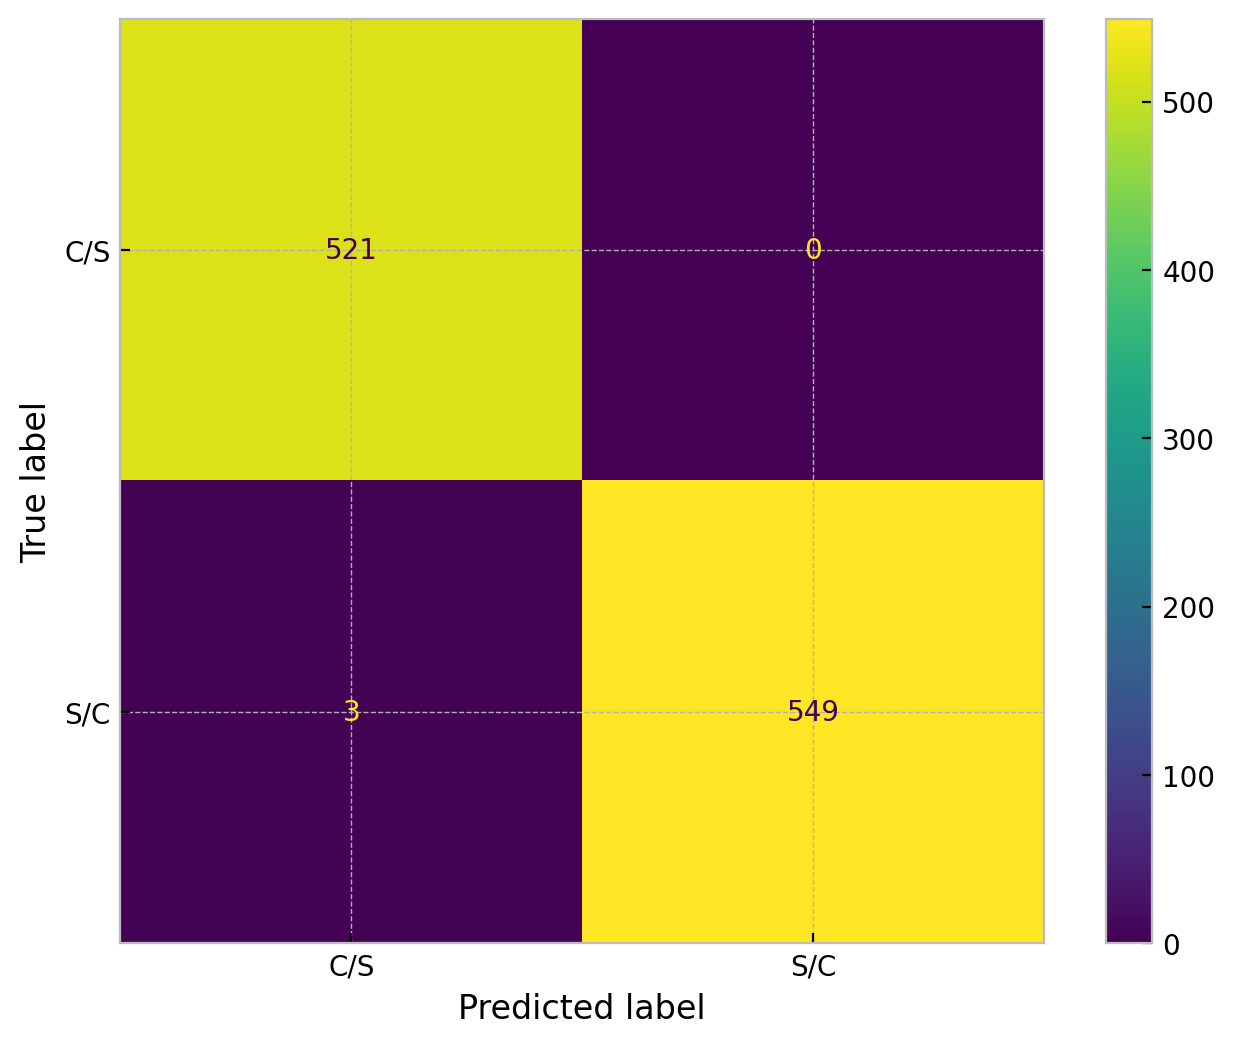

In [61]:
X = expr.to_numpy()
y = behavior.to_numpy()

model = LogisticRegression(max_iter=300)

show_confusion_matrix(model, 10, X, y)

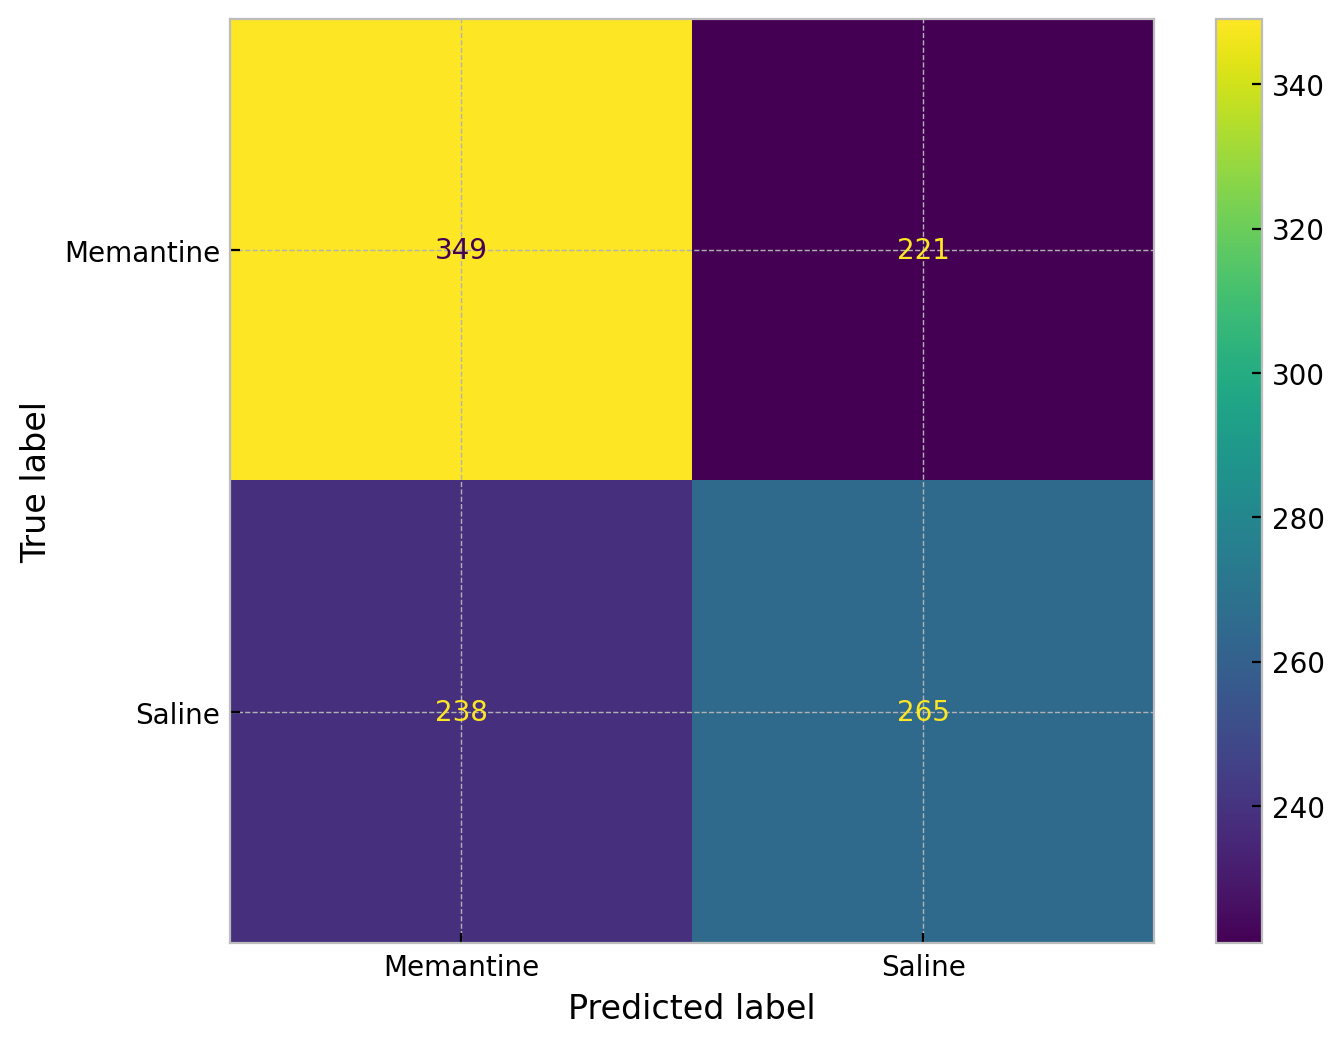

In [62]:
X = expr.to_numpy()
y = treatment.to_numpy()

model = LogisticRegression(max_iter=300)

show_confusion_matrix(model, 10, X, y)

# Classification

- Logistic regression
- Cross validated predictions, probabilities and accuracy
- Confusion matrix
- ROC curve
- *Multinomial logistic regression*

### Learning goals - *Multinomial logistic regression*
|  |  |  |
|--|--|--|
| <img src="images/thinking-icon.png"> | <div class="alert alert-info">You will be able to classify date into more than two classes.</div> |  |

Can you predict which of the eight classes a mouse belongs to based on protein expression?

In [65]:
X = expr.to_numpy()
y = mouse_class.to_numpy()

X.shape, y.shape, np.unique(y)

((1073, 69),
 (1073,),
 array(['c-CS-m', 'c-CS-s', 'c-SC-m', 'c-SC-s', 't-CS-m', 't-CS-s',
        't-SC-m', 't-SC-s'], dtype=object))

In [66]:
# for now we'll just fit all of the data
model = LogisticRegression(max_iter=1000)
model.fit(X, y)

model.coef_.shape

(8, 69)

Each of the 8 sets of coefficients defines a logistic regression model for the binary classification of YES vs. NO for one of the 8 possible classes.

So really, we just fit 8 separate logistic regression models to 8 possible ways of splitting up the response output into binary classifications.

The final predicted class for a mouse is the class with the highest probability across the 8 models.

In [67]:
y_pred = model.predict(X)
y_proba = model.predict_proba(X)

In [68]:
result = pd.DataFrame(y_proba, columns=model.classes_)
result['Prediction'] = y_pred
result

,c-CS-m,c-CS-s,c-SC-m,c-SC-s,t-CS-m,t-CS-s,t-SC-m,t-SC-s,Prediction
0,0.465360,0.519388,6.977088e-09,0.002589,0.010682,0.001961,0.000007,0.000014,c-CS-s
1,0.588059,0.388808,1.955647e-08,0.003550,0.018181,0.001363,0.000009,0.000029,c-CS-m
2,0.523081,0.444847,1.545521e-08,0.002199,0.027724,0.002115,0.000005,0.000030,c-CS-m
3,0.379167,0.576209,1.008475e-07,0.004192,0.036836,0.003532,0.000006,0.000059,c-CS-s
4,0.373957,0.545465,1.851078e-07,0.004767,0.071068,0.004645,0.000006,0.000091,c-CS-s
...,...,...,...,...,...,...,...,...,...
1068,0.005572,0.000467,2.044425e-03,0.066747,0.015555,0.054607,0.003161,0.851846,t-SC-s
1069,0.011501,0.000883,1.407628e-03,0.135048,0.020300,0.042861,0.003410,0.784588,t-SC-s
1070,0.017301,0.001030,4.288427e-03,0.120187,0.044460,0.134041,0.002843,0.675849,t-SC-s
1071,0.015055,0.000600,2.793591e-03,0.103435,0.025393,0.075942,0.003758,0.773022,t-SC-s


In [69]:
print(classification_report(y, y_pred))

              precision    recall  f1-score   support

      c-CS-m       0.92      0.89      0.90       150
      c-CS-s       0.84      0.82      0.83       131
      c-SC-m       0.93      1.00      0.96       150
      c-SC-s       0.99      0.96      0.97       135
      t-CS-m       0.88      0.90      0.89       135
      t-CS-s       0.95      0.97      0.96       105
      t-SC-m       1.00      0.90      0.95       135
      t-SC-s       0.94      1.00      0.97       132

    accuracy                           0.93      1073
   macro avg       0.93      0.93      0.93      1073
weighted avg       0.93      0.93      0.93      1073



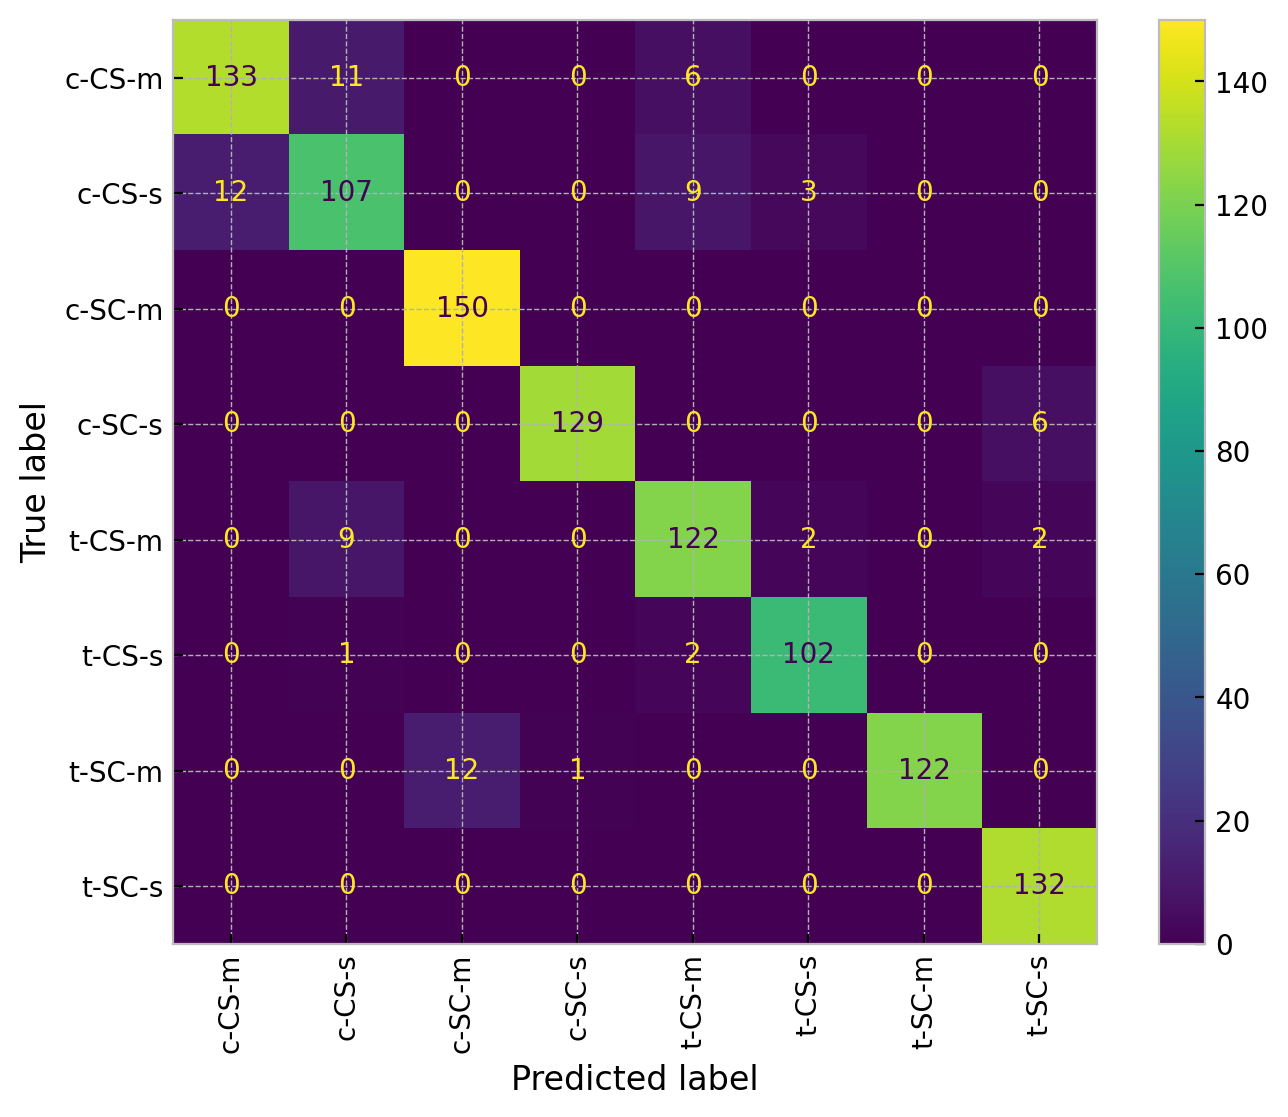

In [70]:
cm = confusion_matrix(y, y_pred)

cmd = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model.classes_)
cmd.plot(xticks_rotation='vertical');

A ROC curve is for a binary decision.

To show ROC curves for multiple classes, we consider for each class the binary classification of that class vs. all other classes.

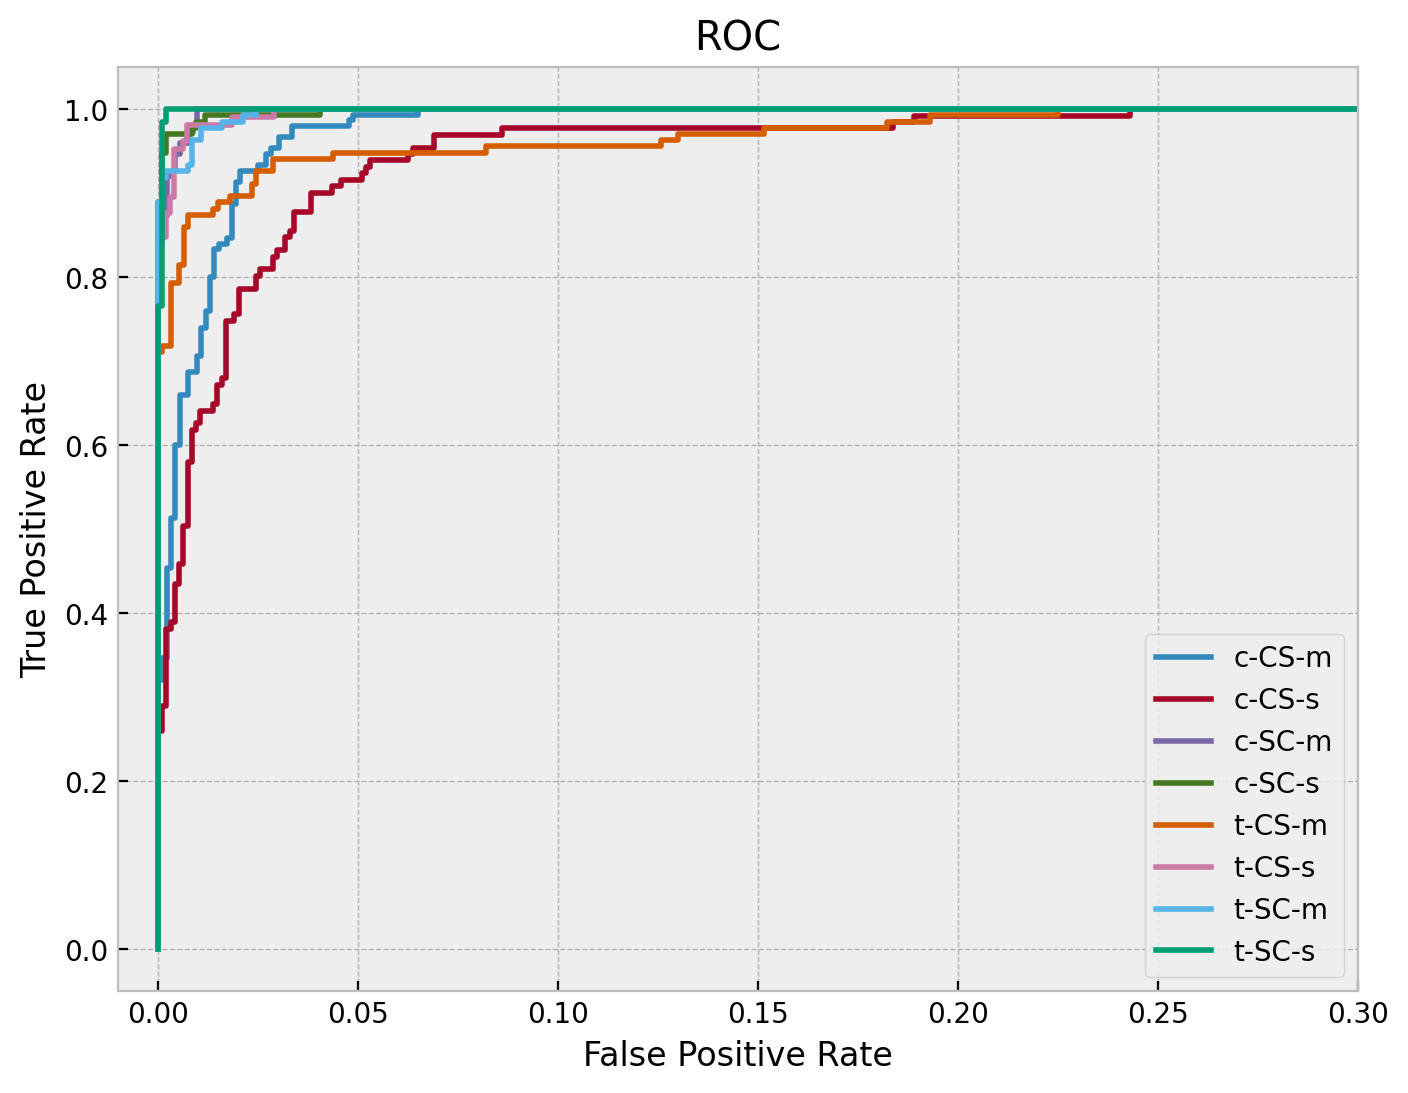

In [71]:
for i, label in enumerate(model.classes_):
    fpr, tpr, _ = roc_curve(y == label, y_proba[:,i])
    plt.plot(fpr, tpr, label=label)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC')
plt.xlim([-0.01, 0.3])
plt.legend();

# Exercise

For a logistic regression classifier of mouse class (one of the 8 classes in the above dataset) based on its cortical nuclear protein expression level profile, use 10-fold cross validation to estimate a confusion matrix that shows the predicted accuracy of the model on mice in the future.

In [ ]:
X = expr.to_numpy()
y = mouse_class.to_numpy()

X.shape, y.shape, np.unique(y)

((1073, 69),
 (1073,),
 array(['c-CS-m', 'c-CS-s', 'c-SC-m', 'c-SC-s', 't-CS-m', 't-CS-s',
        't-SC-m', 't-SC-s'], dtype=object))

In [ ]:
# construct a logistic regression model object
model = LogisticRegression(max_iter=1000)

# use StratifiedKFold to define how to split training/validation sets
# during cross validation
kf = ...

# get cross validated predictions for each data point
y_pred = ...

# print a confusion matrix
cm = ...
cm

# Exercise Key

For a logistic regression classifier of mouse class (one of the 8 classes in the above dataset) based on its cortical nuclear protein expression level profile, use 10-fold cross validation to estimate a confusion matrix that shows the predicted accuracy of the model on mice in the future.

In [63]:
X = expr.to_numpy()
y = mouse_class.to_numpy()

X.shape, y.shape, np.unique(y)

((1073, 69),
 (1073,),
 array(['c-CS-m', 'c-CS-s', 'c-SC-m', 'c-SC-s', 't-CS-m', 't-CS-s',
        't-SC-m', 't-SC-s'], dtype=object))

In [64]:
# construct a logistic regression model object
model = LogisticRegression(max_iter=1000)

# use StratifiedKFold to define how to split training/validation sets
# during cross validation
kf = StratifiedKFold(n_splits=10, shuffle=True, random_state=1)

# get cross validated predictions for each data point
y_pred = cross_val_predict(model, X, y, cv=kf)

# print a confusion matrix
cm = confusion_matrix(y, y_pred)
cm

array([[127,  14,   0,   0,   9,   0,   0,   0],
       [ 18,  96,   0,   0,  12,   5,   0,   0],
       [  0,   0, 148,   0,   0,   0,   2,   0],
       [  0,   1,   0, 126,   0,   0,   0,   8],
       [  1,   9,   0,   0, 119,   3,   0,   3],
       [  0,   2,   0,   0,   4,  99,   0,   0],
       [  0,   0,  16,   2,   0,   0, 117,   0],
       [  0,   0,   0,   0,   0,   0,   0, 132]])

In [66]:
np.unique(y)

array(['c-CS-m', 'c-CS-s', 'c-SC-m', 'c-SC-s', 't-CS-m', 't-CS-s',
       't-SC-m', 't-SC-s'], dtype=object)

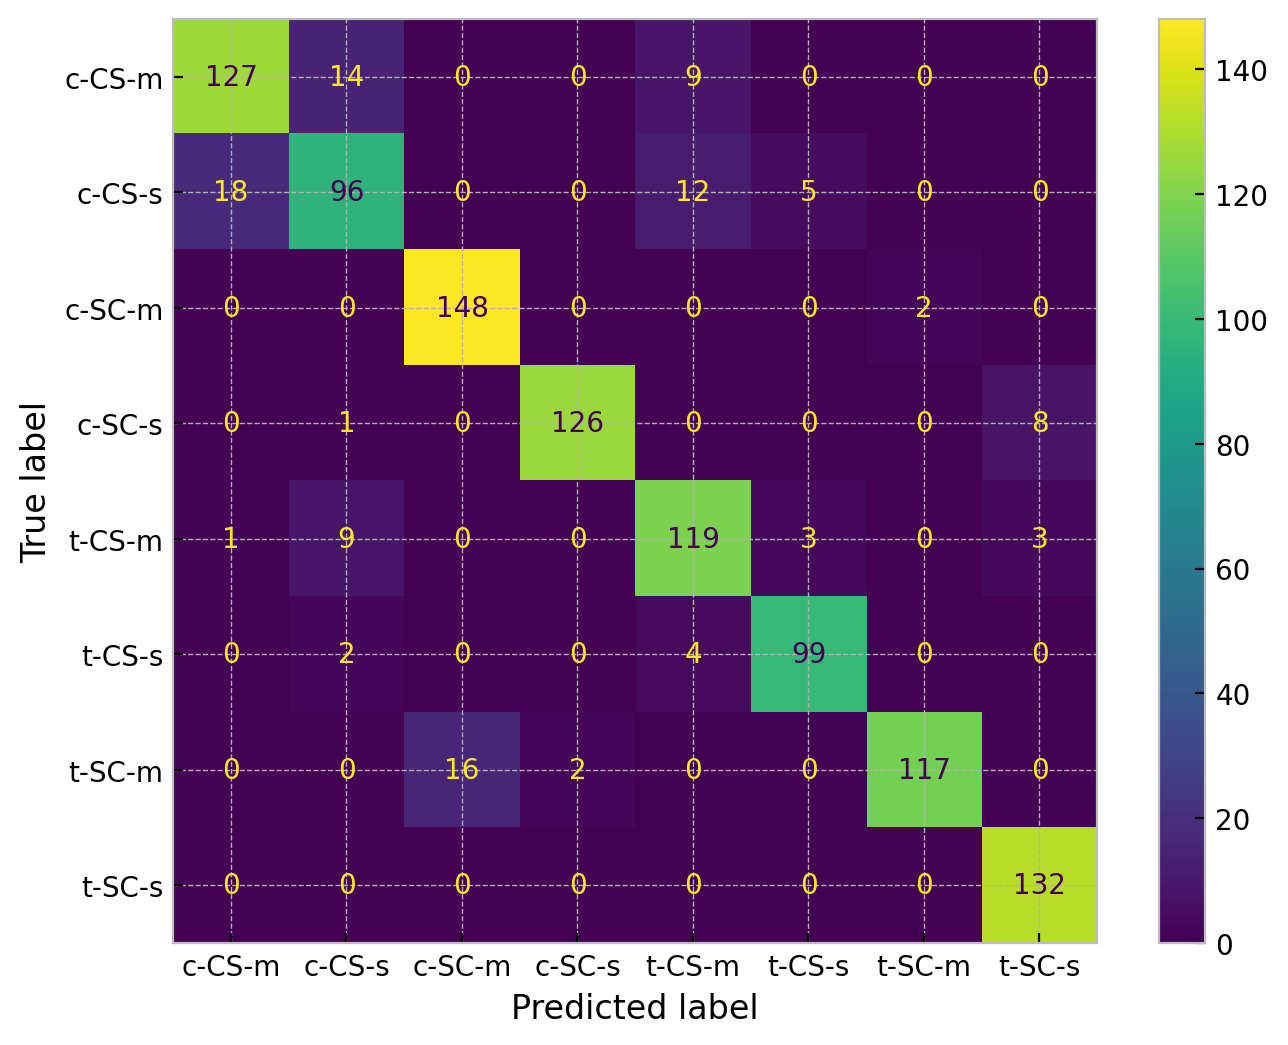

In [76]:
show_confusion_matrix(model, 10, X, y)

Let's find an optimal regularization strength for our model.

In [80]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.utils import shuffle

X = expr.to_numpy()
y = mouse_class.to_numpy()

X2, y2 = shuffle(X, y, random_state=0)

# WARNING!!! This is VERY SLOW!
params = {'C': np.logspace(2, 4, 20)}
model = LogisticRegression(penalty='l2', C=1.0, max_iter=5000)
gridsearch = RandomizedSearchCV(model, params, cv=10, scoring='accuracy')
gridsearch.fit(X2, y2)

best_C = gridsearch.best_params_['C']
best_model = gridsearch.best_estimator_

best_model

LogisticRegression(C=695.1927961775606, max_iter=5000)

This is a more accurate model than our prior logistic regression model with the default regularization.

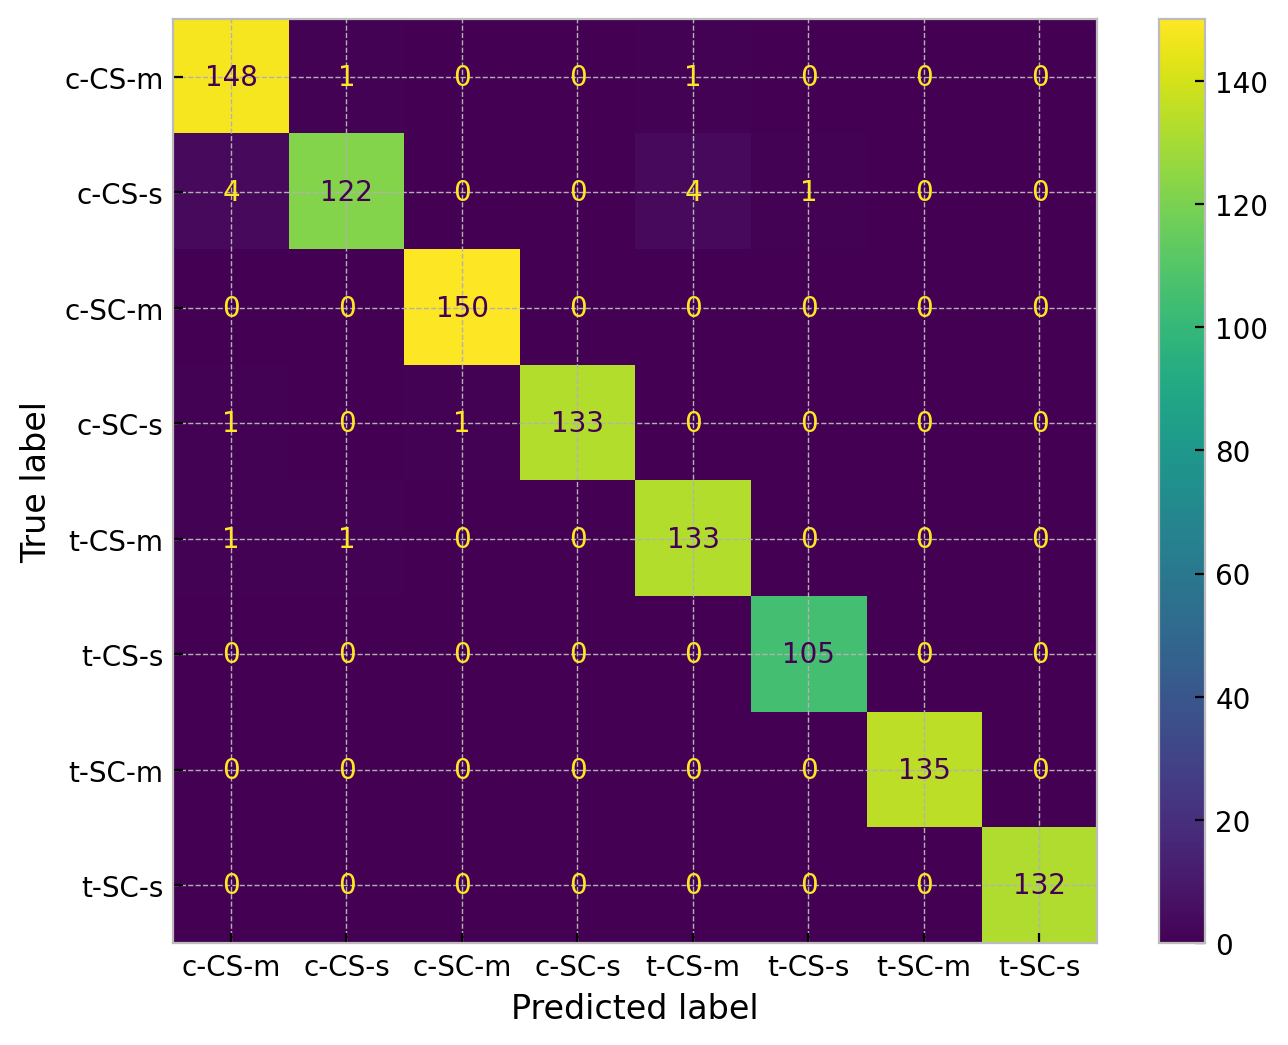

In [81]:
show_confusion_matrix(best_model, 10, X, y)